In [5]:
import tensorflow as tf
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt
from skimage import io, draw
import numpy as np
import unit.img_process as imgp
import cv2

In [6]:
def show(title,image):
    ii=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)  
    io.imshow(ii)
    print(f"{title} : ")
    io.show()

In [7]:
model = keras.models.load_model("./models/deeplabv3_plus_res2netSE.h5")

In [8]:
face_cascade = cv2.CascadeClassifier("./models/haarcascade_frontalface_default.xml")   # 載入人臉模型


dst_face : 


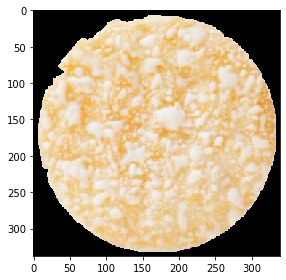

0/1368
frame : 


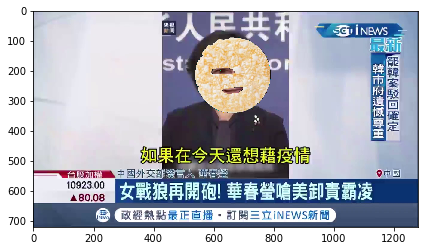

1/1368
frame : 


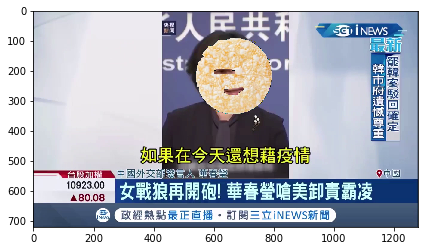

2/1368
frame : 


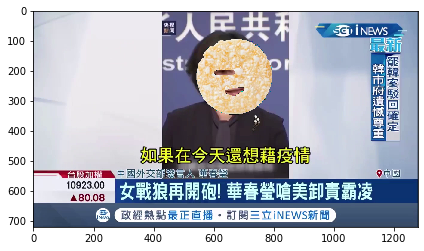

3/1368
frame : 


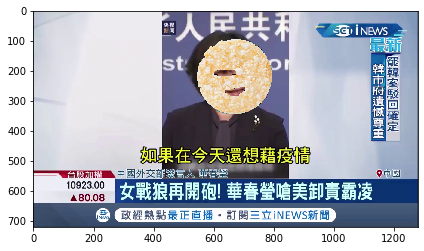

4/1368
frame : 


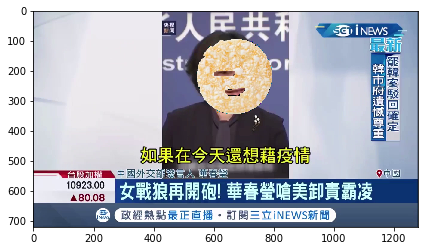

5/1368
frame : 


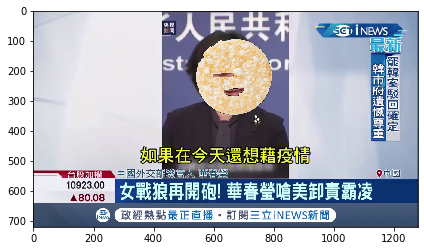

6/1368
frame : 


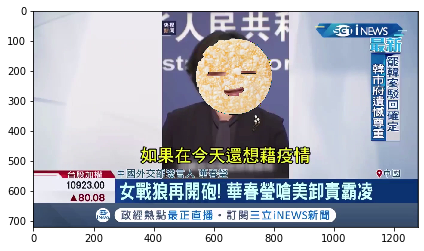

7/1368
frame : 


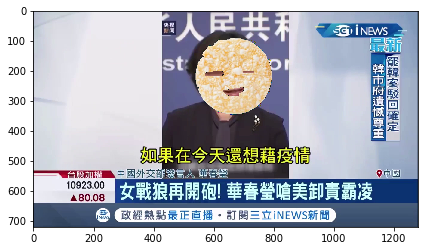

8/1368
frame : 


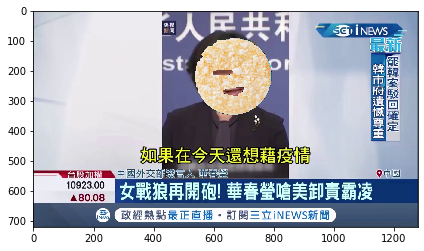

9/1368
frame : 


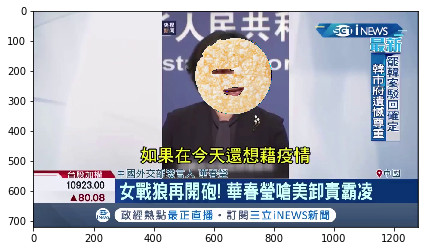

10/1368
frame : 


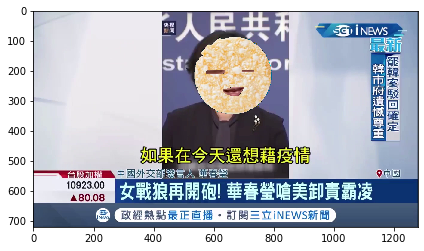

11/1368
frame : 


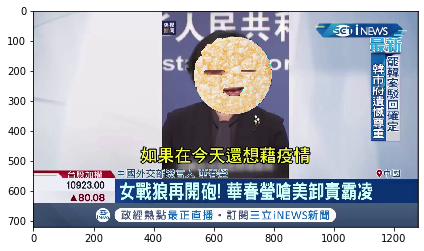

12/1368
frame : 


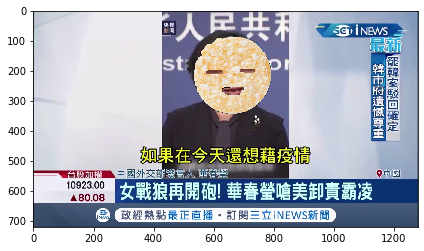

13/1368
frame : 


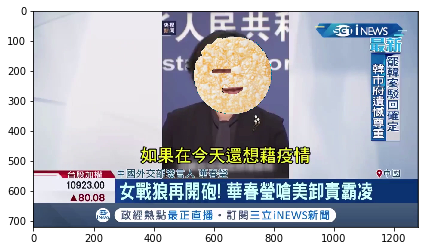

14/1368
frame : 


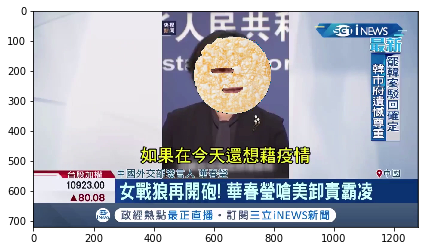

15/1368
frame : 


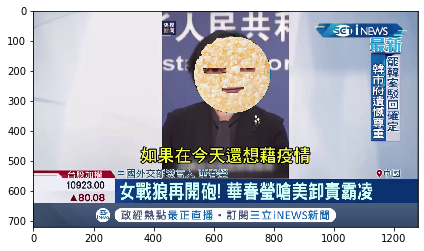

16/1368
frame : 


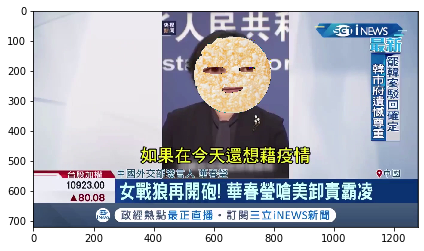

17/1368
frame : 


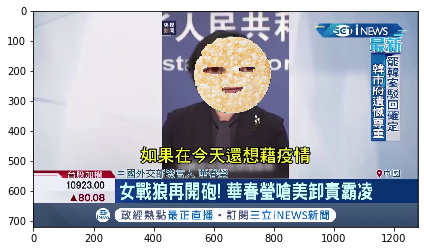

18/1368
frame : 


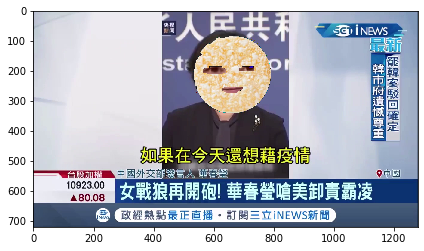

19/1368
frame : 


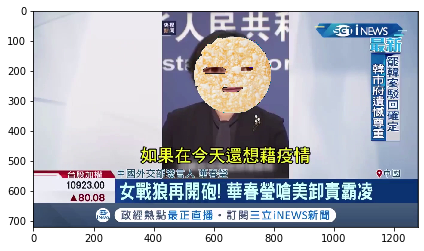

20/1368
frame : 


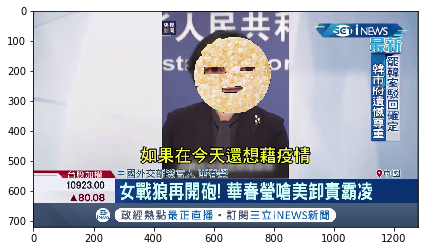

21/1368
frame : 


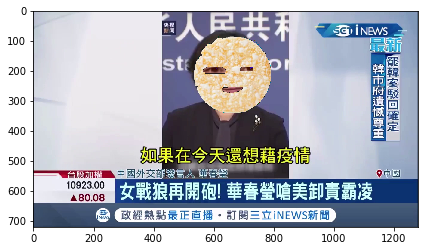

22/1368
frame : 


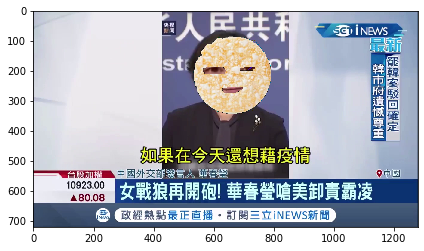

23/1368
frame : 


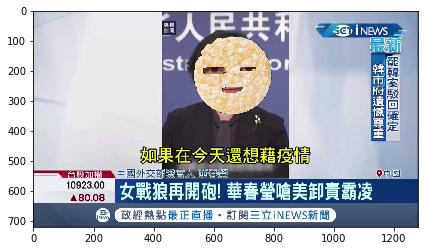

24/1368
frame : 


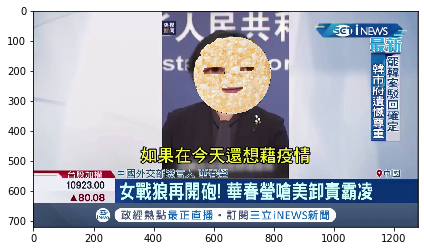

25/1368
frame : 


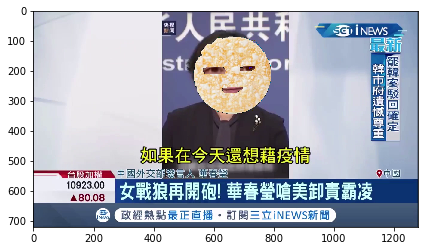

26/1368
frame : 


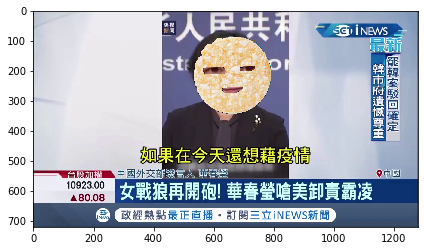

27/1368
frame : 


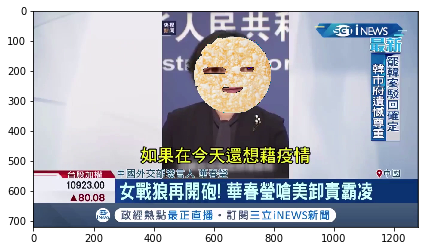

28/1368
frame : 


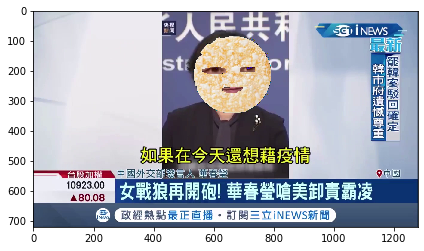

29/1368
frame : 


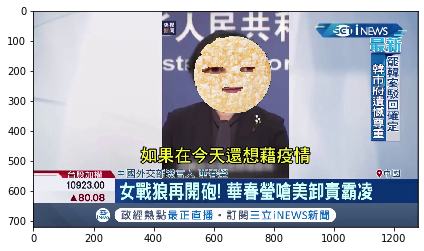

30/1368
frame : 


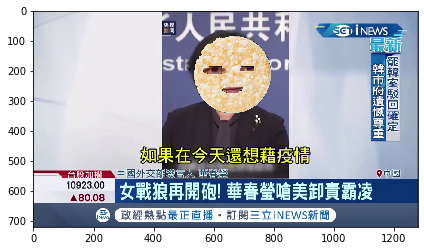

KeyboardInterrupt: 

In [10]:
inp_video_path = './video_inp/666.mp4'
cap = cv2.VideoCapture(inp_video_path) # 讀取電腦中的影片
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
dst_face = cv2.imread('./face_mask_img/face1.jpg')
show('dst_face',dst_face)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
ret, frame = cap.read() 
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('./video_out/666_out.mp4', fourcc, 30.0, (frame.shape[1],  frame.shape[0]))
f = 0
while True:
    ret, frame = cap.read()             
    if not ret:
        print("Cannot receive frame")  
        break
        
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)   
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=9)    # 偵測人臉
    face_img = []
    c_img = frame.copy()
    for (x, y, w, h) in faces:
        
        cv2.rectangle(c_img, (x, y), (x+w, y+h), (0, 255, 0), 2)    # 利用 for 迴圈，抓取每個人臉屬性，繪製方框
        crop_range = [max(0,y-50),min(y+h+50,c_img.shape[0]), max(x-50,0),min(x+w+50,c_img.shape[1])]
        temp = frame[crop_range[0]:crop_range[1], crop_range[2]:crop_range[3],:] #將原始人臉方框增大範圍
        
        face_img.append([crop_range,temp])
        
    for img_range,crop_img in face_img:
        
        mask_img = imgp.get_maskimg(model,crop_img,(512,512),debug=False)
        #print(dst_face.shape)
        swap_face = cv2.resize(dst_face,(crop_img.shape[1],crop_img.shape[0]))
        x1_img = crop_img.copy()
        x1_img[swap_face>=5]=swap_face[swap_face>=5]
 
        temp = mask_img['eye'].copy()
        
        x1_img[temp!=0] = temp[temp!=0]
        x1_img[mask_img['mount']!=0] = mask_img['mount'][mask_img['mount']!=0]
        #show('x1_img',mask_img['eye'])
        frame[img_range[0]:img_range[1], img_range[2]:img_range[3],:] = x1_img
    print(f'{f}/{frame_count}')
    f+=1
    show('frame', frame)
    out.write(frame)
    if cv2.waitKey(1) == ord('q'):     
        break
#     if f > 100 :
#         break
        
out.release()
cap.release()                           
cv2.destroyAllWindows() 



In [6]:
frame .shape

(720, 1280, 3)